[All text]('images tiburón')

[Ataques de Tiburón en el Mundo](https://www.kaggle.com/datasets/gauravkumar2525/shark-attacks/data)

Estudiar los ataques de tiburones a nivel mundial para entender cuándo, dónde y por qué ocurren, identificando las principales causas, especies y actividades humanas relacionadas, con el fin de reducir riesgos y fomentar una convivencia segura con el medio marino.

In [1]:
# Importo las librerías que voy a usar
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Como primer paso, antes de comenzar ha hacer nada, se importan las librerías que se van a utilizar durante el proceso de análisis. 

In [2]:
# Para encontrar el directorio del lugar donde me encuentro
os.getcwd()

'c:\\Users\\mikel\\Desktop\\Berria\\EDA-Ataques-de-tiburones'

A continuación, vamos a consultar el directorio del lugar en el que nos encontramos para saber donde se encuntra guardado nuestro archivo.

In [3]:
# Visulizar los archivos existentes en la carpeta donde me encuentro
print("Archivos en la carpeta actual:")
print(os.listdir())

Archivos en la carpeta actual:
['.git', '0-Enunciado_EDA.ipynb', 'global_shark_attacks.csv', 'global_shark_attacks_nuevo.csv', 'Memoria.ipynb', 'Notebook.ipynb', 'README.md']


Ejecuto os.listdir() para conocer cuales son los archivos que se encuentran en la carpeta que me encuentro

In [4]:
# Leer csv como DataFrame

df = pd.read_csv("global_shark_attacks.csv")

df.head

<bound method NDFrame.head of             date    year          type       country                area  \
0     2023-05-13  2023.0    Unprovoked     AUSTRALIA     South Australia   
1     2023-04-29  2023.0    Unprovoked     AUSTRALIA   Western Australia   
2     2022-10-07  2022.0    Unprovoked     AUSTRALIA  Western  Australia   
3     2021-10-04  2021.0    Unprovoked           USA             Florida   
4     2021-10-03  2021.0    Unprovoked           USA             Florida   
...          ...     ...           ...           ...                 ...   
6885         NaN     NaN  Sea Disaster        GREECE        Off Thessaly   
6886         NaN     NaN    Unprovoked     INDONESIA       Riau Province   
6887         NaN     NaN    Unprovoked          IRAQ              Basrah   
6888         NaN     NaN    Unprovoked  SOUTH AFRICA       KwaZulu-Natal   
6889         NaN     NaN    Unprovoked     AUSTRALIA   Western Australia   

                                               location  

Con pf = pd.read_csv() convierto el dataset que esta en formato cvs en DataFrame y lo puedo abrir en modo lectura. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   name       6670 non-null   object 
 8   sex        6318 non-null   object 
 9   age        3903 non-null   object 
 10  fatal_y_n  6890 non-null   object 
 11  time       3372 non-null   object 
 12  species    3772 non-null   object 
dtypes: float64(1), object(12)
memory usage: 699.9+ KB


df.info() me da información sobre el DataFrame:

    -Si hay valores nulos o no

    -El nombre y la catidad de columnas

    -De que tipo es cada variable, indicado en: Dtype

In [6]:
df = df.drop(["species", "age", "time", "name"], axis = 1, errors = 'ignore')

Como se puede contrastar en el paso anterior, hay muchos valores nulos en las columnas "species", "age", "time", "name". Por ello, para que los análisis sean lo más representables y certeros, se deciden eliminar las columnas mencionadas usando .drop().

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6890 entries, 0 to 6889
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6587 non-null   object 
 1   year       6758 non-null   float64
 2   type       6871 non-null   object 
 3   country    6839 non-null   object 
 4   area       6409 non-null   object 
 5   location   6325 non-null   object 
 6   activity   6304 non-null   object 
 7   sex        6318 non-null   object 
 8   fatal_y_n  6890 non-null   object 
dtypes: float64(1), object(8)
memory usage: 484.6+ KB


Vuelvo a ejecutar df.info( ) para comprobar los cambios realizados en el DataFrame. 

Si nos fijamos, ahora unicamente aparecen 9 columnas en el DataFrame de las 13 de origen.  

In [8]:
## LIMPIEZA DE COLUMNAS TEMPORALES

"""Para cerciorarse de que todos los registros de la columna "date" sean de tipo fecha (17/01/1994) y que las fechas que
vienen en formato de strings ("17/01/1994") o en otro formato inapropiado sean reconocibles a posteriori, se usa la función
 de pandas .to_datetime(). Que es el que se encarga de convertilas al formato apropiado. 

Por otro lado, errors = "coerce" se encarga de asignarles un NaT (“Not a Time”) para desconsiderar las fechas erroneas 
o invalidas sin que se rompa el programa."""

df['date'] = pd.to_datetime(df['date'], errors = 'coerce') 

""" Si algún registro de la columna "year" está vacío, a través de .dt se accede a la información de la columna "date" y 
rellena la columna "year" usando el metodo .fillna() según la información de la la columna "date". """

df['year'] = df['year'].fillna(df['date'].dt.year) 

# Se eliminan las filas sin fecha ni año (no aportan información temporal)
df = df.dropna(subset = ['year'])

"""Para asegurarse de que los registros de la columna "year" sean numeros enteros (int) y no floats, se convierten todos a 
int usando el metodo .astype()"""

df['year'] = df['year'].astype(int) 

Después de haber realizado estos 4 pasos, las columnas temporales de "date" y "year" deberían de estar limpias y reconocibles para poder trabajar con ellas y analizarlas.

In [9]:
## LIMPIEZA DE COLUMNAS CATEGÓRICAS

"""El metodo .fillna() se rellenan los valores nulos de las columnas 'type', 'country', 'area', 'location', 'activity' y 'sex'
con 'Unknown', para que no rompa el programa y evitar errores en análisis posteriores."""

df[['type', 'country', 'area', 'location', 'activity', 'sex']] = df[['type', 'country', 'area', 'location', 'activity', 'sex']].fillna('Unknown')


Ahora, las columnas categóricas de 'type', 'country', 'area', 'location', 'activity', 'sex' deberían de estar sin valores nulos.

In [10]:
## NORMALIZACIÓN DEL TEXTO EN COLUMNAS CATEGÓRICAS

# Se usa .srt.title() para poner en mayúscula la primera letra de cada palabra, el resto se quedan en minúsculas.
# Se usa el metodo str.strip() para eliminar los espacios al principio y al final de cada texto.

df['type'] = df['type'].str.title().str.strip()

df['country'] = df['country'].str.title().str.strip()

df['area'] = df['area'].str.title().str.strip()

df['location'] = df['location'].str.title().str.strip()

df['activity'] = df['activity'].str.title().str.strip() 

Ahora, las columnas categóricas de 'type', 'country', 'area', 'location', 'activity', 'sex' deberían de estar limpias y reconocibles para poder trabajar con ellas y analizarlas.

In [11]:
## LIMPIEZA Y NORMALIZACIÓN DE LA COLUMNA 'fatal_y_n' 

# Pasa todas las letras "y" e "n" a mayúsculas usando .str.upper()
# Se usa el metodo str.strip() para eliminar los espacios en blanco al principio y al final de cada texto.

df['fatal_y_n'] = df['fatal_y_n'].str.upper().str.strip() 

""" 'Y' o 'N' en mayúsculas y sin espacios por delante y detras del texto, se reemplazan por 'Fatal' y 'Non-fatal' a traves 
del metodo .replace(). """

df['fatal_y_n'] = df['fatal_y_n'].replace({'Y': 'Fatal', 'N': 'Non-fatal'})


Ahora, las columna 'fatal_y_n' d debería de estar limpia y reconocible para poder trabajar con ella.

In [12]:

# REVISIÓN FINAL 

"""Comprobar si quedan valores nulos con .isnull(), en caso de que haya se realiza la suma con .sum() 
de todos los valores nulos del df"""

print("Valores nulos por columna:\n", df.isnull().sum())

# df.sample() para coger una muestra del dataset limpio (en este caso: 20 filas aleatorias y se comprueba que el dataset esta limpio) 
print("Ejemplo de datos limpios:\n", df.sample(20)) 

# Guardar el dataset limpio en un csv, index=False evita que se exporte la columna de índice de pandas (numérica)

df.to_csv("global_shark_attacks_nuevo.csv", index=False) 
print("Dataset limpio guardado como 'global_shark_attacks_nuevo.csv'")

Valores nulos por columna:
 date         183
year           0
type           0
country        0
area           0
location       0
activity       0
sex            0
fatal_y_n      0
dtype: int64
Ejemplo de datos limpios:
            date  year        type           country                   area  \
3373 1931-07-15  1931  Unprovoked               Usa             New Jersey   
137  1983-12-21  1983  Unprovoked      South Africa  Eastern Cape Province   
4653        NaT  1855     Invalid         Australia        New South Wales   
3224 2011-09-28  2011  Unprovoked      South Africa  Western Cape Province   
5374 1928-11-04  1928  Unprovoked            Panama         Gulf Of Panama   
4663 2022-08-13  2022  Unprovoked               Usa                Florida   
1733 2015-08-20  2015  Unprovoked               Usa         South Carolina   
6086 1956-08-15  1956  Unprovoked               Usa             California   
627  1984-09-15  1984  Unprovoked               Usa             California   

In [13]:
df

,date,year,type,country,area,location,activity,sex,fatal_y_n
0,2023-05-13,2023,Unprovoked,Australia,South Australia,Elliston,Surfing,M,Fatal
1,2023-04-29,2023,Unprovoked,Australia,Western Australia,"Yallingup, Busselton",Swimming,M,Non-fatal
2,2022-10-07,2022,Unprovoked,Australia,Western Australia,Port Hedland,Spearfishing,M,Non-fatal
3,2021-10-04,2021,Unprovoked,Usa,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,M,Non-fatal
4,2021-10-03,2021,Unprovoked,Usa,Florida,"Jensen Beach, Martin County",Swimming,M,Non-fatal
...,...,...,...,...,...,...,...,...,...
6880,1840-07-22,1840,Unprovoked,Usa,South Carolina,"Charleston Harbor, Charleston County",Accidentally Thrown Overboard & Treading Water...,M,Fatal
6881,1830-04-30,1830,Unprovoked,India,Tamil Nadu,St. Thomé,Bathing,M,Fatal
6882,1828-01-01,1828,Unprovoked,Usa,Hawaii,"Uo, Lahaina, Maui",Surfing,M,Fatal
6883,1792-09-12,1792,Provoked,England,Unknown,On The Thames River,Fishing,M,Fatal


In [14]:
# Información del nuevo DataFrame "global_shark_attacks_nuevo.csv"

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6760 entries, 0 to 6884
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6577 non-null   datetime64[ns]
 1   year       6760 non-null   int64         
 2   type       6760 non-null   object        
 3   country    6760 non-null   object        
 4   area       6760 non-null   object        
 5   location   6760 non-null   object        
 6   activity   6760 non-null   object        
 7   sex        6760 non-null   object        
 8   fatal_y_n  6760 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 528.1+ KB


Vuelvo a ejecutar df.info( ) para comprobar los cambios realizados en el DataFrame. Como vemos, ya no hay valores nulos.

## Hipotesis Planteadas

Con el dataset limpio, normalizado y sin nulos, me he planteado 5 hipotesis:

    1. Los ataques de tiburón han aumentado en las últimas décadas.

    2. El surf y la natación muestran una incidencia de ataques superior a la de otras actividades. 

    3. Los ataques afectan mayoritariamente a hombres. 

    4. Las actividades de buceo o pesca submarina tienen una mayor tasa de mortalidad. 

    5. En australia los ataques fatales son más frecuentes que en lo demas paises.

In [15]:
df.shape

(6760, 9)

In [16]:
df.describe(include='all')

,date,year,type,country,area,location,activity,sex,fatal_y_n
count,6577,6760.000000,6760,6760,6760,6760,6760,6760,6760
unique,NaN,NaN,12,202,840,4363,1484,7,7
top,NaN,NaN,Unprovoked,Usa,Florida,Unknown,Surfing,M,Non-fatal
freq,NaN,NaN,4955,2505,1166,529,1111,5437,4739
mean,1973-07-24 03:01:17.178044704,1970.922781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1703-03-26 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1951-10-05 00:00:00,1950.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988-02-15 00:00:00,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2009-09-02 00:00:00,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2023-08-16 00:00:00,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Hipótesis 1: Los ataques de tiburón han aumentado en las últimas décadas.

In [17]:
# Mostrar todas las filas en consola 
pd.set_option('display.max_rows', None)

# .groupby('year') crea grupos donde todas las filas con el mismo año se agrupan juntas
#  .size() cuenta cuántos registros/ataques ocurrieron en cada año.
# .sort_index() ordena los resultados por el índice (En este caso: los años)

ataques_por_año = df.groupby('year').size().sort_index()

print(ataques_por_año)

year
1         1
1000      1
1500      1
1518      1
1543      1
1554      1
1555      1
1580      1
1595      1
1617      1
1637      1
1638      1
1640      1
1642      2
1700      3
1703      1
1721      1
1723      1
1733      1
1738      1
1742      1
1748      1
1749      1
1751      1
1753      1
1755      1
1758      1
1764      1
1767      1
1771      1
1776      2
1779      1
1780      1
1783      1
1784      1
1785      1
1786      1
1787      1
1788      1
1791      1
1792      1
1797      1
1800      1
1801      1
1802      1
1803      2
1804      1
1805      1
1807      1
1808      3
1810      1
1811      1
1812      1
1815      1
1816      1
1817      4
1818      1
1819      1
1822      1
1823      1
1825      2
1826      5
1827      3
1828      2
1829      3
1830      4
1831      2
1832      2
1834      1
1835      2
1836      3
1837      4
1839      4
1840      5
1841      1
1842      4
1844      4
1845      6
1846      3
1847      9
1848      4
1849      7
1850      2

Al visualizar los datos, se ve que hay años sin registrar. Sobretodo de los primeros años, a partir del 1800 hay registros de todos los años.

Por ello, filtro el análisis a partir de 1800, donde los datos son más completos y por lo tanto más fiables.

In [18]:
# Filtrar los registros a partir de 1800 en adelante.
df_filtrado = df[df['year'] >= 1800]

# Agrupar y contar ataques por año, a partir del año 1800.
ataques_por_año = df_filtrado.groupby('year').size().sort_index()

# Mostrar todos los resultados

print(ataques_por_año)

year
1800      1
1801      1
1802      1
1803      2
1804      1
1805      1
1807      1
1808      3
1810      1
1811      1
1812      1
1815      1
1816      1
1817      4
1818      1
1819      1
1822      1
1823      1
1825      2
1826      5
1827      3
1828      2
1829      3
1830      4
1831      2
1832      2
1834      1
1835      2
1836      3
1837      4
1839      4
1840      5
1841      1
1842      4
1844      4
1845      6
1846      3
1847      9
1848      4
1849      7
1850      2
1851      3
1852     10
1853      8
1855      7
1856      4
1857      1
1858      6
1859      1
1860      7
1861      5
1862     12
1863     11
1864     14
1865      4
1866      2
1867      5
1868      6
1869      2
1870      8
1871      9
1872      8
1873      4
1874     12
1875      5
1876      9
1877     14
1878     13
1879      8
1880     15
1881      9
1882     12
1883     13
1884      7
1885      9
1886     16
1887     13
1888     15
1889      9
1890     17
1891      9
1892     11
1893     13

In [19]:
# Creo una columna de 'decada' directamente en el df original para poder contrastar la hipotesis.
    # df['year'] // 10 ----> divide y redondea hacia abajo Y elimina el último dígito del año.
               #  * 10 ---->  se multiplica el resultado por 10 para volver al primer año de la década.

df['decada'] = (df['year'] // 10) * 10


df_filtrado = df[df['year'] >= 1800].copy()


# Comprobamos si existe la columna 'decada' a través de .columns:

print("Columnas disponibles:", df_filtrado.columns)


"""Se agrupan los años por decadas con . groupby(), se cuentan los ataques de cada decada con .size(), con .reset_index()
crea una nueva columna de numero de ataques 'n_ataques' creando un Dataframe y se ordenan las decadas de menor a mayor 
con .sort.values()"""

ataques_por_decada = (df_filtrado.groupby('decada').size().reset_index(name='n_ataques').sort_values('decada'))


# Visualizamos el DataFrame final

print("\nAtaques por década:")
print(ataques_por_decada.head(10))

Columnas disponibles: Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'sex', 'fatal_y_n', 'decada'],
      dtype='object')

Ataques por década:
   decada  n_ataques
0    1800         11
1    1810         11
2    1820         17
3    1830         22
4    1840         43
5    1850         42
6    1860         68
7    1870         90
8    1880        118
9    1890        150


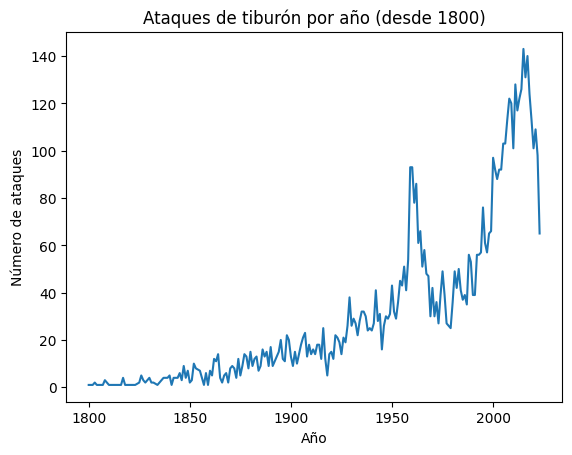

In [20]:
# plt.plot() --------------------> Crea gráficos de líneales.

# plt.title() -------------------> Para nombrar el título general del gráfico en la parte superior.

# plt.xlabel() ------------------> Etiqueta para nombrar el eje X.

# plt.ylabel() ------------------> Etiqueta para nombrar el eje Y.

plt.plot(ataques_por_año.index, ataques_por_año.values)
plt.title('Ataques de tiburón por año (desde 1800)')
plt.xlabel('Año')
plt.ylabel('Número de ataques')

# plt.show() ----> Muestra el gráfico.

plt.show()

## Hipótesis 2: El surf y la natación muestran mayor incidencia.

In [21]:
df['activity'].full

AttributeError: 'Series' object has no attribute 'full'

In [ ]:
top_actividades = df['activity'].value_counts().head(15)

top_actividades

activity
Surfing            1111
Swimming            994
Unknown             567
Fishing             490
Spearfishing        382
Wading              169
Bathing             163
Diving              133
Snorkeling          126
Standing            113
Scuba Diving         98
Body Boarding        70
Boogie Boarding      59
Body Surfing         55
Kayaking             41
Name: count, dtype: int64

Realizo el recuento de las 15 actividades con mayor número de ataques. Con value.counts() realizo el conteo y head(15) me filtra las 15 actividades con mayor número de ataques.

C:\Users\mikel\AppData\Local\Temp\ipykernel_340\1060043002.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_actividades.index, x = top_actividades.values, palette = 'crest')


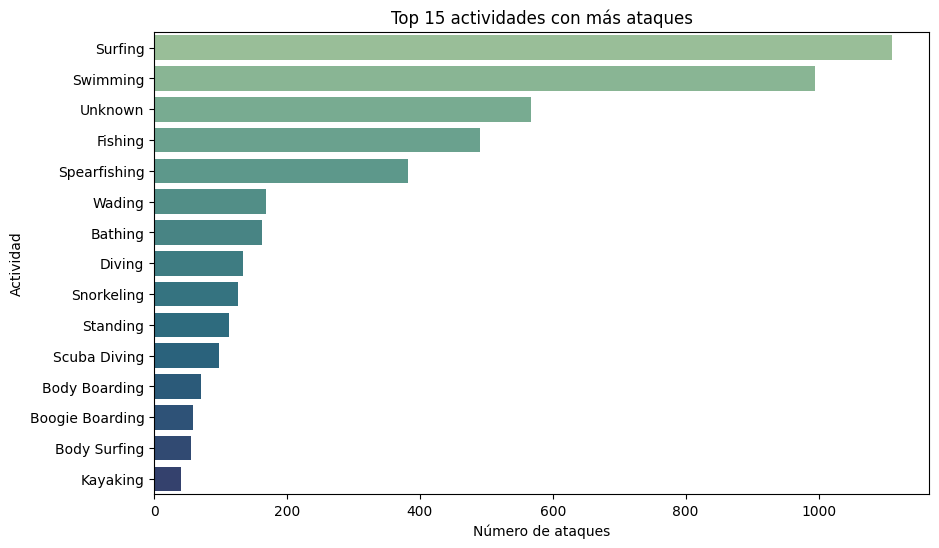


Top 10 actividades con más ataques:
activity
Surfing            1111
Swimming            994
Unknown             567
Fishing             490
Spearfishing        382
Wading              169
Bathing             163
Diving              133
Snorkeling          126
Standing            113
Scuba Diving         98
Body Boarding        70
Boogie Boarding      59
Body Surfing         55
Kayaking             41
Name: count, dtype: int64


In [ ]:
"""
# plt.figure(figsize=(10,6)) crea una figura o lienzo de 10 pulgadas de ancho y 6 de alto.

# sns.barplot()

    # y = top_actividades.index  ----> Coloca el nombre de las actividades en el eje horizontal (Y).

    # x = top_actividades.values ----> Coloca el número de ataques asociados a cada actividad en el eje horizontal (X).

    # palette = 'crest'--------------> Palette sirve para definir una paleta de colores que usará el gráfico, en este caso es 'crest'.
                                       'crest' es una paleta de Seaborn que tiene colores de tonos suaves en azul y verde.

# plt.title() -------------------> Para nombrar el título general del gráfico en la parte superior.

# plt.xlabel() ------------------> Etiqueta para nombrar el eje X.

# plt.ylabel() ------------------> Etiqueta para nombrar el eje Y.

"""

top_actividades = df['activity'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y = top_actividades.index, x = top_actividades.values, palette = 'crest')
plt.title('Top 15 actividades con más ataques')
plt.xlabel('Número de ataques')
plt.ylabel('Actividad')

# plt.show() ----> Muestra el gráfico.

plt.show()

print("\nTop 10 actividades con más ataques:")
print(top_actividades)

Según la gráfica se ve claramente que las actividades que reciben mayor cantidad de ataques son el Surf y la Natación tal y como predecimos en la hipótesis.

## Hipótesis 3: Los ataques afectan mayoritariamente a hombres.

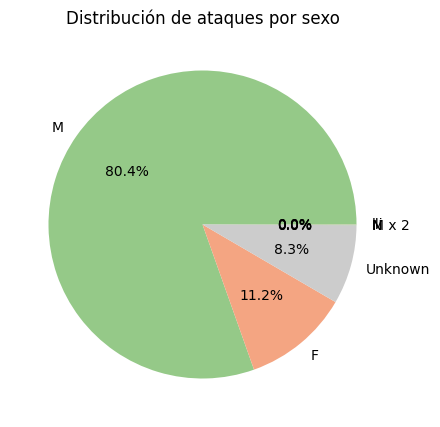


Distribución por sexo (%):
sex
M          80.43
F          11.17
Unknown     8.33
N           0.03
.           0.01
M x 2       0.01
lli         0.01
Name: proportion, dtype: float64


In [ ]:
"""
# plt.figure(figsize=(10,6)) crea una figura o lienzo de 10 pulgadas de ancho y 6 de alto.

# df['sex'].value_counts() nos hace el recuento de los distinto valores de la columna 'sex'.

    # El parámetro 'autopct' (“automatic percentage”) se utiliza para mostrar automáticamente los porcentajes de las variables dentro de
    cada porción del gráfico de pastel. 

    # Defino los colores con 'colors=' y hago uso de https://coolors.co/ para personalizar los colores de cada porción del gráfico de pastel. 

# autopct='%1.1f%%' muestra el porcentaje con un decimal dentro del gráfico.

# plt.title() -------------------> Para nombrar el título general del gráfico en la parte superior.

# plt.xlabel('') ------------------> Etiqueta para nombrar el eje X (le meto  comillas para que no mombre el eje por defecto).

# plt.ylabel('')  Etiqueta para nombrar el eje Y (le meto  comillas para que no mombre el eje por defecto).

"""

plt.figure(figsize=(6,5))
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors = ["#95c988", '#f4a582', '#cccccc'])
plt.title('Distribución de ataques por sexo')
plt.xlabel('')
plt.ylabel('')

# plt.show() ----> Muestra el gráfico.

plt.show()

""" 
# Imprime los porcentajes de cada categoría en sex: toma la columna df['sex'], calcula la proporción de cada valor "
  con value_counts(normalize=True) (donde normalize=True hace que devuelva proporciones en lugar de conteos), multiplica por 100
  para obtener porcentajes, redondea a 2 decimales y los muestra con print()."""

print("\nDistribución por sexo (%):")
print(round(df['sex'].value_counts(normalize=True)*100, 2))

In [ ]:
# Pasar todo a mayúsculas y quitar espacios
df['sex'] = df['sex'].str.upper().str.strip()

# Reemplazar valores incorrectos por 'UNKNOWN'
df['sex'] = df['sex'].replace({'M X 2': 'M',
                               'N': 'UNKNOWN',
                               '.': 'UNKNOWN',
                               'LLI': 'UNKNOWN',
                               '': 'UNKNOWN',
                               np.nan: 'UNKNOWN'})

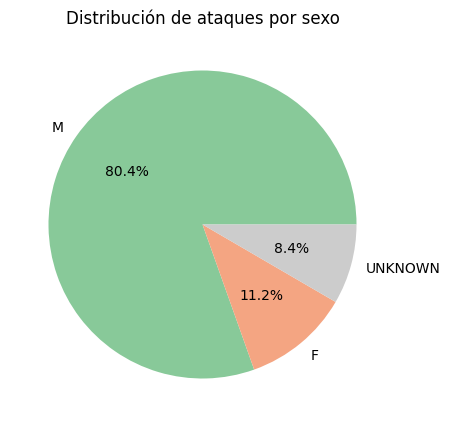


Distribución por sexo (%):
sex
M          80.44
F          11.17
UNKNOWN     8.39
Name: proportion, dtype: float64


In [ ]:
# Hipótesis 3: Los ataques afectan mayoritariamente a hombres.

plt.figure(figsize=(6,5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['#88c999', '#f4a582', '#cccccc'])
plt.title('Distribución de ataques por sexo')
plt.xlabel('')
plt.ylabel('')

plt.show()

print("\nDistribución por sexo (%):")
print(round(df['sex'].value_counts(normalize=True)*100, 2))

C:\Users\mikel\AppData\Local\Temp\ipykernel_17728\4107025440.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mortalidad_filtrada = mortalidad_por_actividad[df['activity'].value_counts() >= 10]


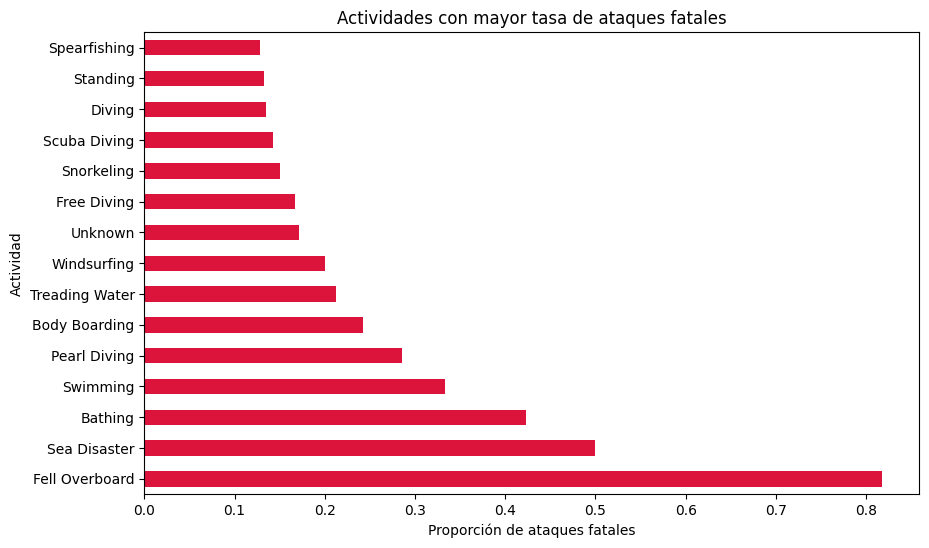


Top 10 actividades con mayor tasa de ataques fatales:


fatal_y_n,2017.0,F,Fatal,NQ,Non-fatal,UNKNOWN,Y X 2
activity,,,,,,,
43-Ton Schooner Irene Capsized & Sank,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63' Fishing Boat Sno' Bay Foundered,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"90 European Civilians, Many Women & Children, Were Placed On The Deck Of A Japanese Submarine That Submerged When It Was Well Offshore",0.0,0.0,1.0,0.0,0.0,0.0,0.0
A 210-Ton Brig Was Sunk By A Japanese Submarine. Some Of The Survivors Were Machine-Gunned & Some Were Taken By Sharks,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13 Men In The Water After Sailboat Capsized & Sank,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wreck Of The Tweed,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wreck Of The Union Steamship Company 982-Ton Iron Steamer Kafir,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wreck Of The Uss Somers,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Yacht Of Michael Howell Capsized,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
# Hipótesis 4: Buceo y pesca submarina tienen mayor tasa de mortalidad.

mortalidad_por_actividad = (df.groupby('activity')['fatal_y_n']
                            .value_counts(normalize = True)
                            .unstack()
                            .fillna(0)
                            .sort_values('Fatal', ascending = False))

# Filtrar solo actividades con al menos 10 registros
mortalidad_filtrada = mortalidad_por_actividad[df['activity'].value_counts() >= 10]

plt.figure(figsize=(10,6))
mortalidad_filtrada['Fatal'].head(15).plot(kind = 'barh', color = 'crimson')
plt.title('Actividades con mayor tasa de ataques fatales')
plt.xlabel('Proporción de ataques fatales')
plt.ylabel('Actividad')
plt.show()

print("\nTop 10 actividades con mayor tasa de ataques fatales:")
display(mortalidad_por_actividad.head(10))

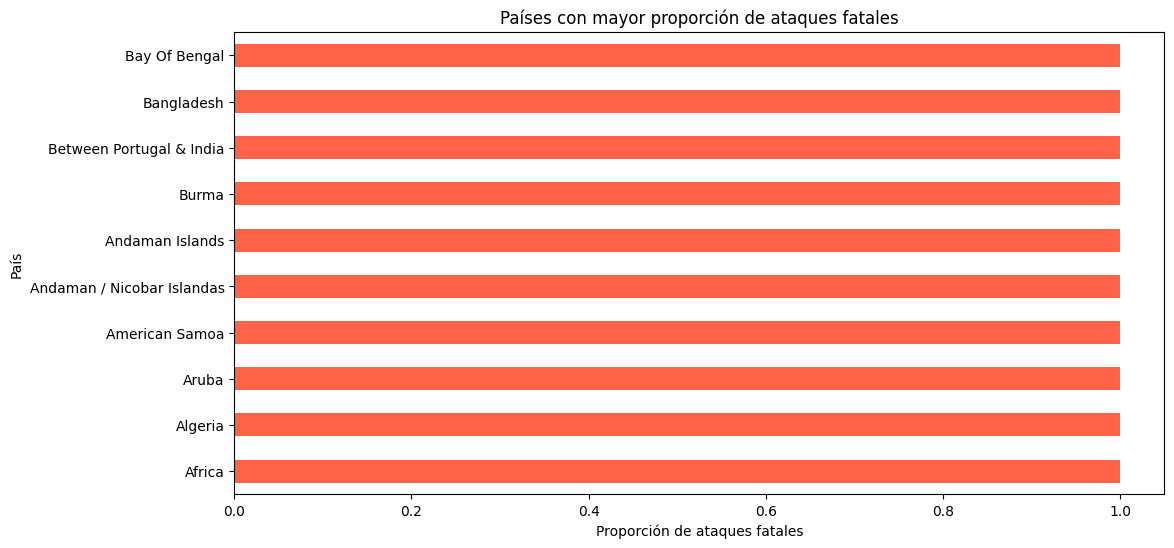


Top 10 países con mayor tasa de ataques fatales:


In [22]:
# Hipótesis 5: En Australia los ataques fatales son más frecuentes.

fatal_por_pais = (df.groupby('country')['fatal_y_n']
                  .value_counts(normalize = True)
                  .unstack()
                  .fillna(0)
                  .sort_values('Fatal', ascending = False))

# Mostrar top 10 países por tasa de fatalidad

plt.figure(figsize=(12,6))
fatal_por_pais['Fatal'].head(10).plot(kind = 'barh', color = 'tomato')
plt.title('Países con mayor proporción de ataques fatales')
plt.xlabel('Proporción de ataques fatales')
plt.ylabel('País')
plt.show()

print("\nTop 10 países con mayor tasa de ataques fatales:")